<a href="https://colab.research.google.com/github/CoweiChou/face-recognition/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import glob
# 大家預設的資料夾會從 (我的雲端硬碟) 也就是 My Drive 開始
flist = glob.glob("/gdrive/My Drive/face-recognition/known_person/*")
flist

['/gdrive/My Drive/face-recognition/known_person/Jerry.jpeg',
 '/gdrive/My Drive/face-recognition/known_person/Puff.jpeg',
 '/gdrive/My Drive/face-recognition/known_person/Lisa.png',
 '/gdrive/My Drive/face-recognition/known_person/Kuma.jpeg']

In [ ]:
import glob
unknown_flist = glob.glob("/gdrive/My Drive/face-recognition/unknown_person/*")
unknown_flist

['/gdrive/My Drive/face-recognition/unknown_person/unknown8.jpeg',
 '/gdrive/My Drive/face-recognition/unknown_person/unknown4.jpeg',
 '/gdrive/My Drive/face-recognition/unknown_person/unknown1.jpeg',
 '/gdrive/My Drive/face-recognition/unknown_person/unknown6.jpeg',
 '/gdrive/My Drive/face-recognition/unknown_person/unknown7.jpeg',
 '/gdrive/My Drive/face-recognition/unknown_person/unknown2.jpeg',
 '/gdrive/My Drive/face-recognition/unknown_person/unknown5.jpeg',
 '/gdrive/My Drive/face-recognition/unknown_person/unknown3.jpeg']

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=e70533f96bb5e8e1344c7ce16ecf7ebddae550097cbdc1b7649e928332c5abcc
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import face_recognition
# 讀者如果在這出錯, 請額外安裝 opencv-python
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

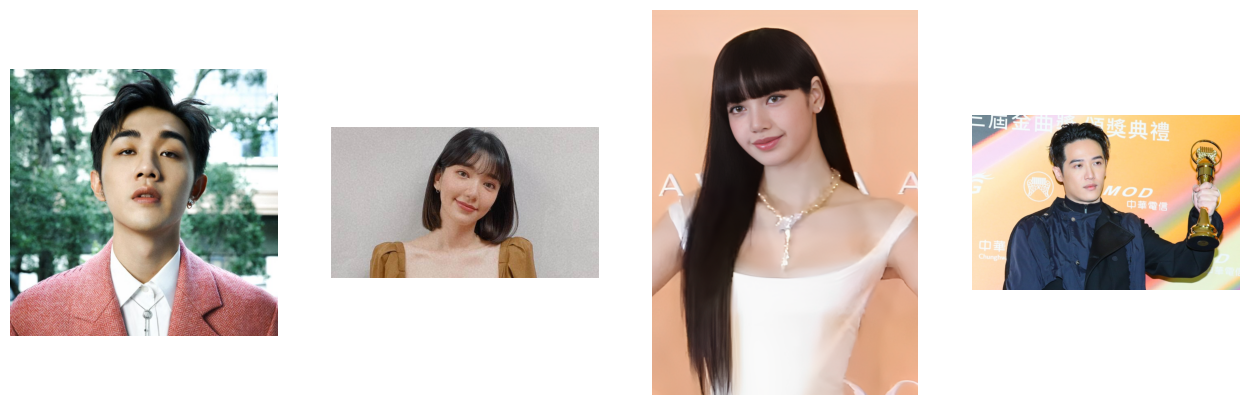

In [ ]:
import os
# 最後要記錄出的樣品向量 (128 維度) 和標籤 (明星名)
encodinglist = []
labels = []
# 一橫列畫幾個人
width = 5
# 總共幾個橫列
height = int(len(flist) / width) + 1 # 整個大圖的 size
plt.figure(figsize=(20, 5))
for (i, f) in enumerate(flist):
    # Step1. 讀取檔案
    img = face_recognition.load_image_file(f)
    # Step2. 把臉的降維向量算出, 用已經做好的 cnn, [0] 第一張臉
    face_encoding = face_recognition.face_encodings(img)[0]
    # Step3. 抓出臉的方框, 我們這裡沒用到, 但如果你想畫框就會需要
    # 這裡的 face_locations 可以使用 cnn(深度學習) 或者 haar(固定特徵) 來得到
    # 如果需要快速, 請使用 haar, 如果需要更準確, 就使用 cnn, 建議可以使用預設 haar 即可
    (top, right, bottom, left) = face_recognition.face_locations(img, model="cnn")[0]
    # Step4. 把它加到我自己準備的 list 裡
    encodinglist.append(face_encoding)
    # Step5. 把檔名前面的人名 split 出來
    name = os.path.split(f)[-1].split(".")[0]
    # Step6. 把人名到我自己準備的 list
    labels.append(name)
    # 利用 enumerate 得到的 i 指定 subplot
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    plt.imshow(img)


In [ ]:
# 秀一下臉降維過後的向量
print("維度:", len(encodinglist[2]))
encodinglist[2]

維度: 128


array([-0.06803785, -0.04641898,  0.02678195, -0.09920187, -0.13358767,
       -0.1175167 , -0.13506116, -0.05037524,  0.20271339, -0.13748336,
        0.18008818, -0.04098993, -0.19134071, -0.0147322 , -0.04223573,
        0.19660743, -0.19712514, -0.15510699,  0.00181712,  0.00881451,
        0.06270718,  0.01017257, -0.00436451,  0.09721357, -0.19631261,
       -0.38724542, -0.11712743, -0.04352779, -0.15440938, -0.07408577,
        0.03756741,  0.05074642, -0.23259835,  0.01369021,  0.01358557,
        0.14244434,  0.03737286, -0.09884515,  0.10281514,  0.06205355,
       -0.32199162,  0.02290551,  0.04299188,  0.2149509 ,  0.18401402,
       -0.01975688,  0.00249181, -0.11532593,  0.16702692, -0.22451861,
        0.0037293 ,  0.113017  ,  0.01644804, -0.00434691,  0.06700614,
       -0.08721909,  0.04169491,  0.17710975, -0.17546682, -0.02840953,
        0.05344657, -0.00670542,  0.03558417, -0.11991462,  0.21548401,
        0.07700175, -0.15228246, -0.17003381,  0.1115718 , -0.16

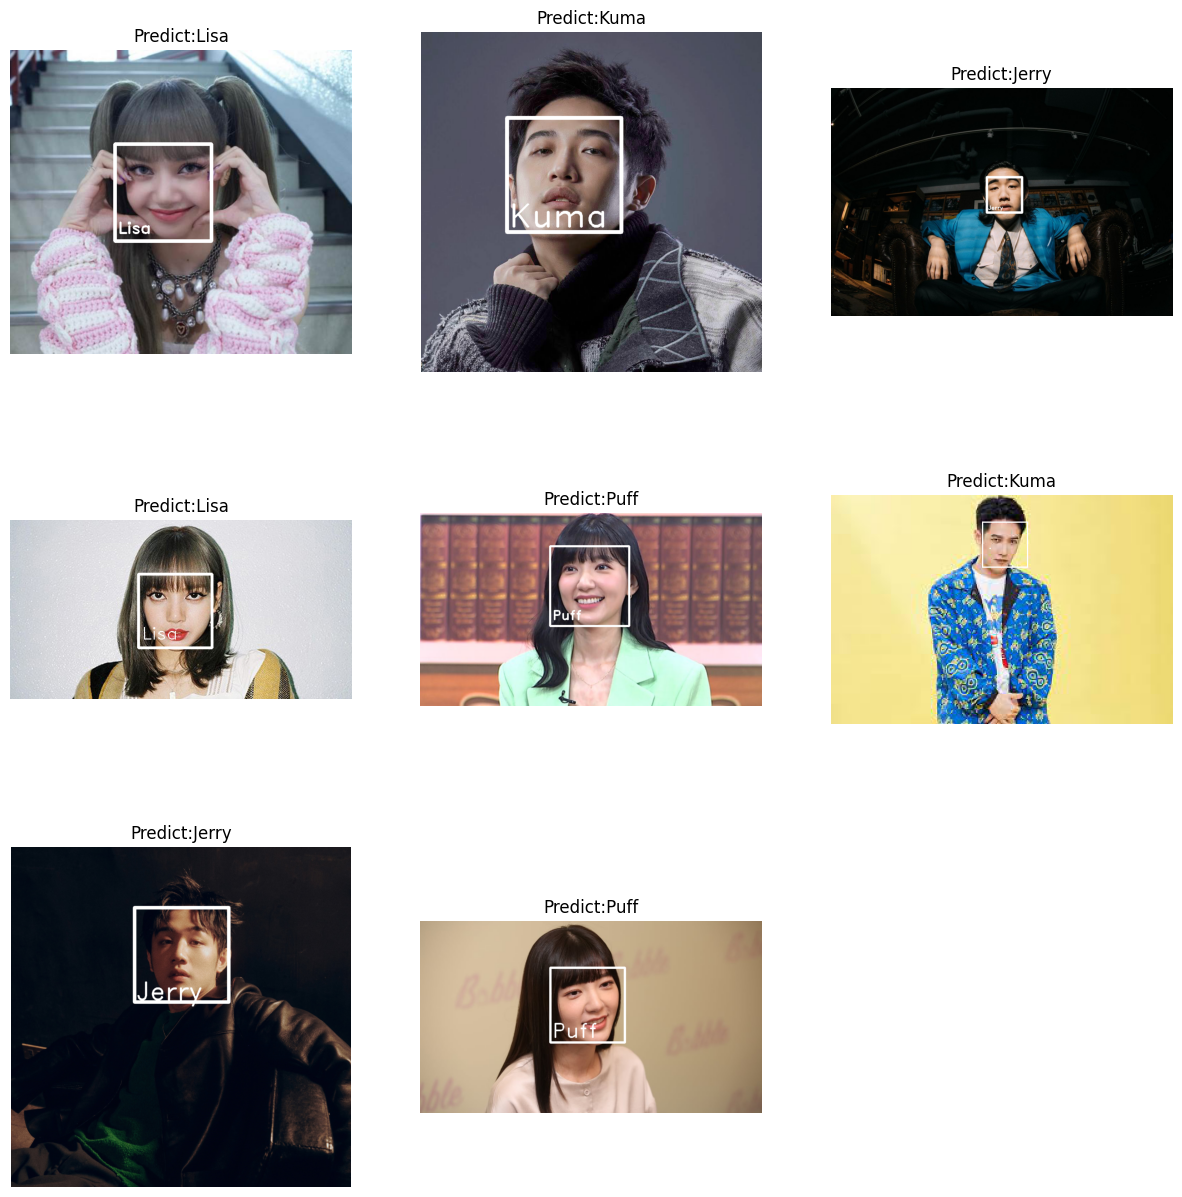

In [ ]:
import numpy as np
plt.figure(figsize=(15, 15))
width = 3
height = int(len(unknown_flist) / width) + 1
for (i, f) in enumerate(unknown_flist):
    img = face_recognition.load_image_file(f)
    face_encoding = face_recognition.face_encodings(img)[0]
    # (top, right, bottom, left)
    (top, right, bottom, left) = face_recognition.face_locations(img)[0]
    # rectangle(要畫的圖, 左上座標, 右下座標, 顏色, 粗細)
    size = int(img.shape[0] / 100)
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), size)
    font = cv2.FONT_HERSHEY_DUPLEX
    # face_distance-> 算跟妳傳進去的 encodinglist 每一個距離
    results = face_recognition.face_distance(encodinglist, face_encoding)
    # 這裡使用 argmin(axis=-1) 稍微難一點, 是得到群集裡最小值的 index 部分
    name = labels[np.array(results).argmin(axis=-1)]
    labels.append(name)
    # 把文字放到我的圖上, 文字放在框右移 6, 上移 15 的位置
    # putText(圖片, 標籤, 起始座標, 字型, 字型大小, 顏色, 粗細)
    # 這裡我有刻意根據框的大小調整字體大小, 如果讀者沒特別需求可以都設成 1
    cv2.putText(img, name, (left + 6, bottom - 15),
                font, (right-left)//100 ,
                (255, 255, 255), (right-left)//75)
    plt.subplot(height, width, i + 1)
    plt.title("Predict:" +  name)
    plt.axis("off")
    plt.imshow(img)